In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
df_patientRoute = pd.read_csv('../dataset/PatientRoute.csv')
pt = pd.pivot_table(df_patientRoute, index=['date','type'],values='patient_id', aggfunc='count')

leisure = []
park = []
gym=[]

for idx, cnt in pt.iterrows():
    
    if idx[1] in ['beauty_salon', 'pc_cafe', 'cafe', 'bar', 'karaoke']:
        leisure.append(cnt[0])
        park.append(0)
        gym.append(0)
    
    elif idx[1] in ['park']:
        leisure.append(0)
        park.append(cnt[0])
        gym.append(0)
        
    elif idx[1] in ['gym']:
        leisure.append(0)
        gym.append(cnt[0])
        park.append(0)
        
    else:
        leisure.append(0)
        gym.append(0)
        park.append(0)
        
pt['leisure'] = leisure
pt['park'] = park
pt['gym'] = gym
pt['total'] = pt.leisure + pt.park + pt.gym

pt2 = pd.pivot_table(pt, index=['date'], values=['leisure','park','gym','total'], aggfunc='sum')

In [4]:
pt2.index = pd.to_datetime(pt2.index)
route_bymonth = pt2.resample('M').sum()
# route_bymonth['date'] = route_bymonth.index
route_bymonth.index = ['1월','2월','3월','4월','5월','6월']
route_bymonth

,gym,leisure,park,total
1월,0,2,0,2
2월,18,112,6,136
3월,2,70,3,75
4월,0,43,0,43
5월,5,60,1,66
6월,0,0,0,0


In [5]:
df = route_bymonth.copy()
df['leisure'] = np.round(df['leisure']/df['total']*100)
df['gym_park'] = np.round((df['gym'] + df['park']) / df['total']*100)
df = df['gym_park'][:-1]

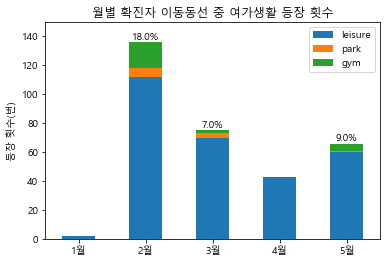

In [6]:
ax = route_bymonth[['leisure','park','gym']][:-1].plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.title('월별 확진자 이동동선 중 여가생활 등장 횟수')
plt.ylabel('등장 횟수(번)')
plt.ylim(0,150)
cnt=0
for p in ax.patches[-5:]: 
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if df[cnt] != 0:
        ax.annotate(f'{df[cnt]}%',( x+ width/2, y + height+2), ha='center', fontsize=10)
    cnt+=1
plt.show()